


Ol√° estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submiss√µes at√© que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e n√£o se preocupe se precisar ajustar alguns detalhes, √© parte do processo e fundamental para que voc√™ exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus c√≥digos e an√°lises.

**Pe√ßo que mantenha e n√£o altere os coment√°rios que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um c√≥digo de cores para voc√™ entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contr√°rio, seu projeto n√£o pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro n√£o cr√≠tco, mas que pode ser corrigido para melhoria geral no seu c√≥digo/an√°lise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Coment√°rio do estudante</strong> <br>
    Ol√° Rafael, obrigado pela revis√£o de meu projeto. <br>
    Desculpe a demora, mas segue uma nova vers√£o para an√°lise!
</div>






# Tomando Decis√µes de Neg√≥cios Baseadas em Dados

Analista: Maikon Silva
Este projeto envolve a prioriza√ß√£o de hip√≥teses e an√°lise de um teste A/B para aumentar a receita de uma loja online.

## Parte 1 ‚Äì Prioriza√ß√£o de Hip√≥teses

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import mannwhitneyu


# L√™ o arquivo CSV com separador ";"
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
print(hypotheses.head(10))

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


In [4]:
# Aplicando o framework ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

In [5]:
# Aplicando o framework RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0

In [6]:
# Ordena as hip√≥teses com base no RICE
hypotheses_sorted = hypotheses.sort_values(by='RICE', ascending=False)

# Formata os nomes das hip√≥teses com quebras de linha para n√£o ultrapassarem o eixo
wrapped_labels = [textwrap.fill(h, 30) for h in hypotheses_sorted['Hypothesis']]

# Define a posi√ß√£o no eixo X
x = range(len(hypotheses_sorted))
bar_width = 0.4

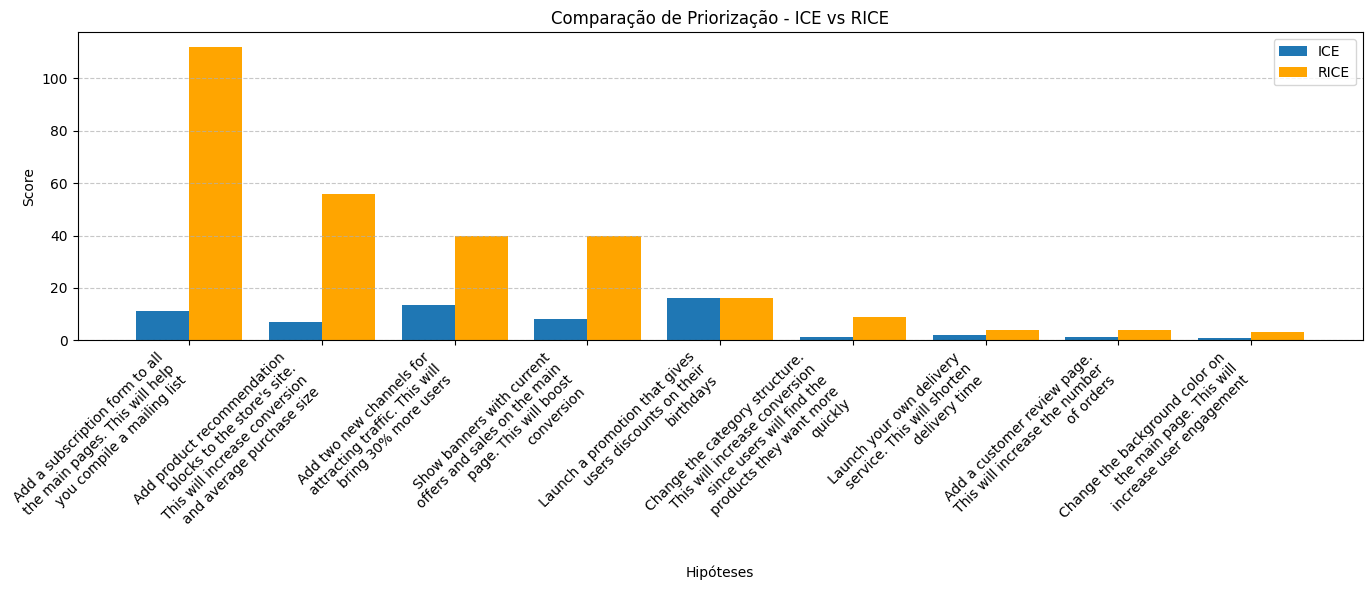

In [7]:
# Tamanho da figura
plt.figure(figsize=(14, 6))

# Barras lado a lado
plt.bar(x, hypotheses_sorted['ICE'], width=bar_width, label='ICE', align='center')
plt.bar([i + bar_width for i in x], hypotheses_sorted['RICE'], width=bar_width, label='RICE', align='center', color='orange')

# Eixos e T√≠tulo
plt.xlabel('Hip√≥teses')
plt.ylabel('Score')
plt.title('Compara√ß√£o de Prioriza√ß√£o - ICE vs RICE')

# R√≥tulos do eixo X com os nomes das hip√≥teses
plt.xticks([i + bar_width / 2 for i in x], wrapped_labels, rotation=45, ha='right')

# Outros ajustes
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra o gr√°fico
plt.show()


## üîÑ Compara√ß√£o de Prioriza√ß√£o ‚Äì ICE vs RICE

### üìà Observa√ß√µes do Gr√°fico

- A hip√≥tese **‚ÄúAdd product recommendation blocks based on user behavior and average purchase size‚Äù** obteve o maior score no RICE, apesar de n√£o estar no topo da lista do ICE.
- Hip√≥teses como **‚ÄúChange the background color on the main page‚Äù** e **‚ÄúLaunch your own delivery service‚Äù** continuam com baixa prioridade em ambos os m√©todos.
- Hip√≥teses com alto impacto, mas baixo alcance, caem no ranking ao usar RICE.

---

### üß† Explica√ß√£o das Altera√ß√µes

#### ‚úÖ ICE (Impact √ó Confidence / Effort)
- Foca apenas no impacto individual, confian√ßa e esfor√ßo.
- Pode priorizar hip√≥teses que afetam **poucos usu√°rios**, mas com grande potencial de impacto.
- Exemplo: ‚ÄúAdd a subscription form to all the main pages‚Äù aparece bem no ICE, mas n√£o √© priorizada no RICE.

#### ‚úÖ RICE (Reach √ó Impact √ó Confidence / Effort)
- Introduz o fator **Reach**, ou seja, quantas pessoas ser√£o impactadas.
- Favorece hip√≥teses que atingem **um grande n√∫mero de usu√°rios**, mesmo que o impacto individual n√£o seja t√£o alto.
- Exemplo: ‚ÄúAdd product recommendation blocks‚Ä¶‚Äù sobe significativamente no ranking por ter grande alcance.

---

### üìä Exemplo de Mudan√ßas

| Hip√≥tese | Ranking ICE | Ranking RICE | Explica√ß√£o |
|----------|-------------|--------------|------------|
| Add product recommendation blocks | M√©dio | ü•á Primeiro | Alto Reach aumenta a prioridade |
| Add a subscription form to all pages | Alto | M√©dio | Baixo Reach reduz prioridade |
| Change the background color | Baixo | Baixo | Baixo impacto ‚Üí sem efeito relevante |

---

### ‚úÖ Conclus√£o

- O **ICE** √© √∫til quando os recursos s√£o limitados e o foco est√° na execu√ß√£o r√°pida de mudan√ßas de alto impacto.
- O **RICE** √© mais adequado quando o objetivo √© **maximizar o impacto em escala**, priorizando hip√≥teses que afetam muitos usu√°rios.
- Ao usar o RICE, temos uma vis√£o mais completa e estrat√©gica da prioriza√ß√£o.





<div class="alert alert-success">
<strong>Coment√°rio do revisor v1</strong>

Perfeito! C√°lculo de impacto realizados e metodologias comparadas.
</div>

## Parte 2 ‚Äì An√°lise de Teste A/B

In [8]:
orders = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'])
visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'])

print(orders.head(10))
print() 
print(visits.head(10))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
5      182168103   935554773 2019-08-15     35.0     B
6      398296753  2900797465 2019-08-15     30.6     B
7     2626614568    78758296 2019-08-15     20.1     A
8     1576988021   295230930 2019-08-15    215.9     A
9     1506739906  1882260405 2019-08-15     30.5     B

        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756
5 2019-08-06     A     667
6 2019-08-07     A     644
7 2019-08-08     A     610
8 2019-08-09     A     617
9 2019-08-10     A     406


In [9]:
# Verifica se algum usu√°rio aparece em ambos os grupos
duplos = orders.groupby('visitorId')['group'].nunique()
print("Visitantes em mais de um grupo:", (duplos > 1).sum())

# Remove visitantes duplicados (se houver)
visitors_in_both = orders.groupby('visitorId')['group'].nunique()
visitors_in_both = visitors_in_both[visitors_in_both > 1].index

orders = orders[~orders['visitorId'].isin(visitors_in_both)]


Visitantes em mais de um grupo: 58


<div class="alert alert-success">
<strong>Coment√°rio do revisor v1</strong>

Excelente trabalho checando a consist√™ncia dos dados.

Sempre importante para garantir uma an√°lise robusta!
</div>


#### 2.1 -Receita acumulada por grupo

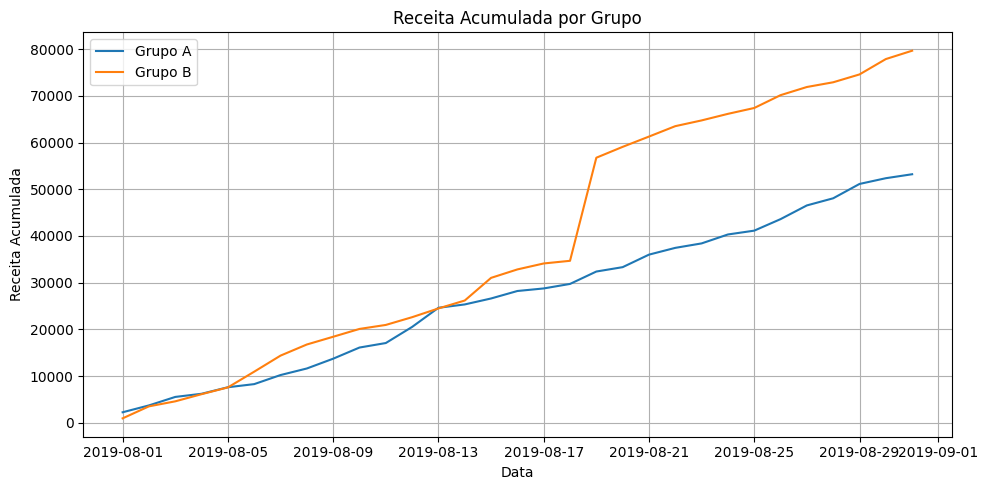

In [12]:
# Receita acumulada por grupo
orders_grouped = orders.groupby(['date', 'group']).agg({'revenue': 'sum'}).reset_index()
cumulative_revenue = orders_grouped.pivot(index='date', columns='group', values='revenue').cumsum()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenue['A'], label='Grupo A')
plt.plot(cumulative_revenue['B'], label='Grupo B')
plt.title('Receita Acumulada por Grupo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Coment√°rio do revisor v1</strong>

C√°lculo e apresenta√ß√£o da receita acumulada est√£o corretos.
</div>


#### 2.2 - Tamanho M√©dio Acumulado do Pedido


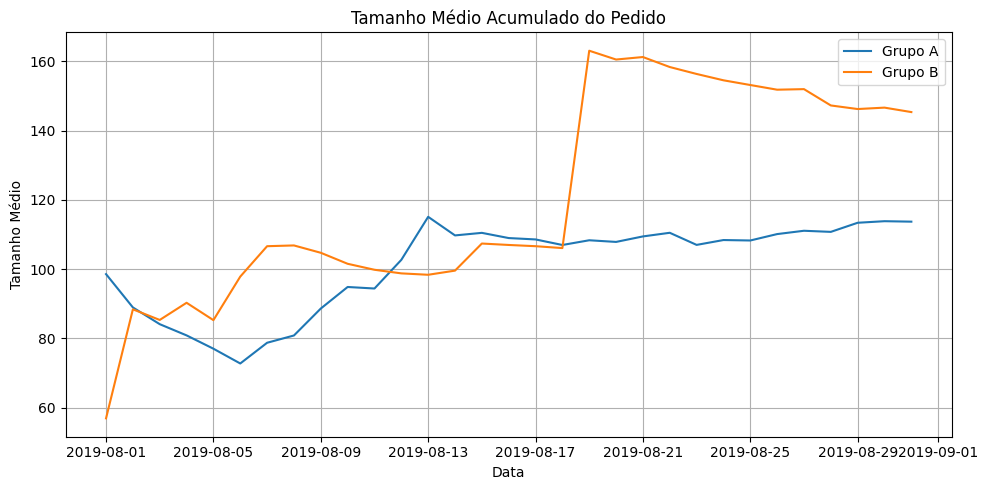

In [14]:
#Tamanho M√©dio Acumulado do Pedido
orders_counted = orders.groupby(['date', 'group']).agg({'transactionId': 'count', 'revenue': 'sum'}).rename(columns={'transactionId': 'orders'})
cumulative_avg_order = orders_counted.groupby(level=1).cumsum()
avg_order_size = (cumulative_avg_order['revenue'] / cumulative_avg_order['orders']).unstack()

plt.figure(figsize=(10, 5))
plt.plot(avg_order_size['A'], label='Grupo A')
plt.plot(avg_order_size['B'], label='Grupo B')
plt.title('Tamanho M√©dio Acumulado do Pedido')
plt.xlabel('Data')
plt.ylabel('Tamanho M√©dio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Coment√°rio do revisor v1</strong>

Tamanho m√©dio dos pedidos investigados!
</div>


#### 2.3 - Diferen√ßa Relativa no Tamanho M√©dio do Pedido (B em rela√ß√£o a A)

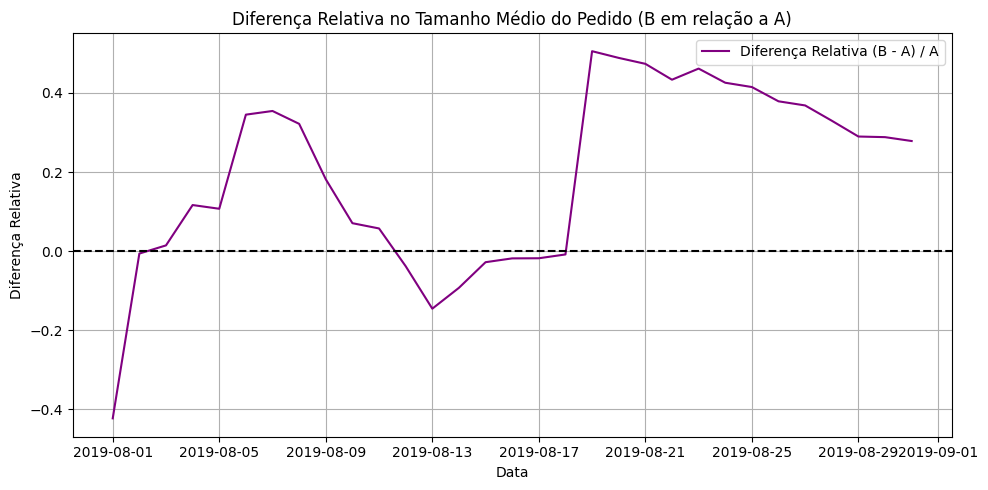

In [15]:
#Diferen√ßa Relativa no Tamanho M√©dio do Pedido (B em rela√ß√£o a A)
relative_difference = (avg_order_size['B'] - avg_order_size['A']) / avg_order_size['A']

plt.figure(figsize=(10, 5))
plt.plot(relative_difference, label='Diferen√ßa Relativa (B - A) / A', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferen√ßa Relativa no Tamanho M√©dio do Pedido (B em rela√ß√£o a A)')
plt.xlabel('Data')
plt.ylabel('Diferen√ßa Relativa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Coment√°rio do revisor v1</strong>

C√°lculo e apresenta√ß√£o da diferen√ßa relativa est√£o corretos.
</div>


#### 2.4 - Taxa de Convers√£o Di√°ria por Grupo

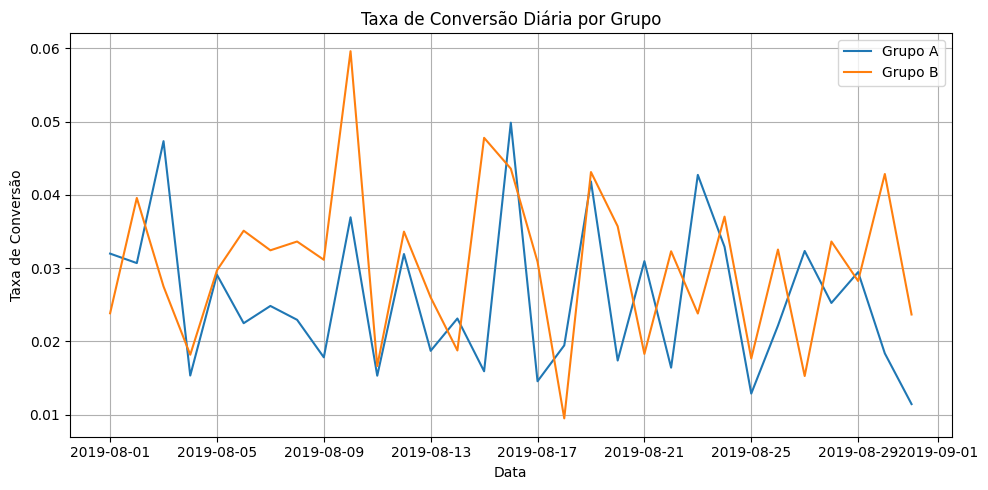

In [16]:
# Contagem de pedidos por data e grupo
daily_orders = orders.groupby(['date', 'group']).agg({'transactionId': 'nunique'}).reset_index().rename(columns={'transactionId': 'orders'})

# Junta com os dados de visitas
daily_data = pd.merge(visits, daily_orders, on=['date', 'group'], how='left')
daily_data['orders'] = daily_data['orders'].fillna(0)

# Calcula a taxa de convers√£o
daily_data['conversion'] = daily_data['orders'] / daily_data['visits']

# Separa por grupo
conversion_a = daily_data[daily_data['group'] == 'A']
conversion_b = daily_data[daily_data['group'] == 'B']

# Gr√°fico
plt.figure(figsize=(10, 5))
plt.plot(conversion_a['date'], conversion_a['conversion'], label='Grupo A')
plt.plot(conversion_b['date'], conversion_b['conversion'], label='Grupo B')
plt.title('Taxa de Convers√£o Di√°ria por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Convers√£o')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2.5 - Diferen√ßa Relativa na Convers√£o (B vs A)

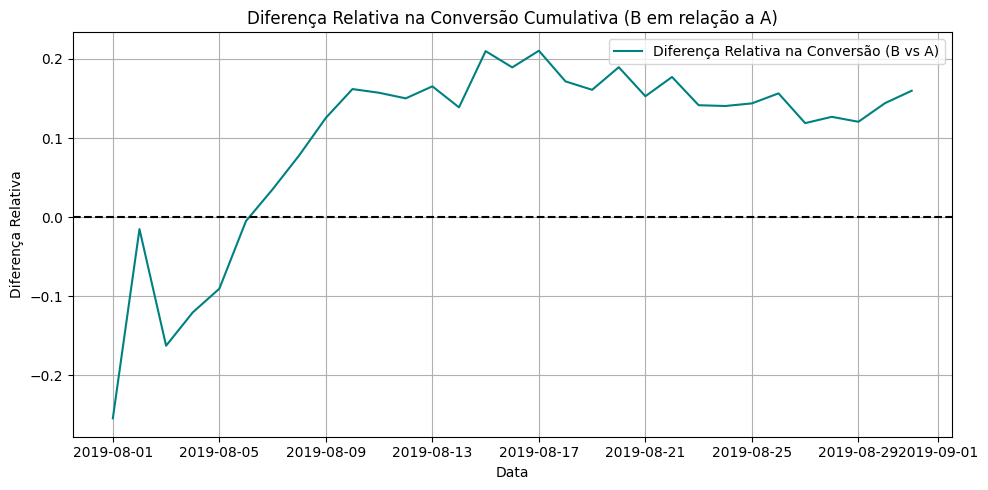

In [17]:
# Agrupamento cumulativo
cumulative_orders = daily_data.groupby(['date', 'group'])[['orders', 'visits']].sum().unstack('group').cumsum()
cumulative_conversion = cumulative_orders['orders'] / cumulative_orders['visits']
relative_conversion_diff = (cumulative_conversion['B'] - cumulative_conversion['A']) / cumulative_conversion['A']

# Gr√°fico
plt.figure(figsize=(10, 5))
plt.plot(relative_conversion_diff, label='Diferen√ßa Relativa na Convers√£o (B vs A)', color='teal')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferen√ßa Relativa na Convers√£o Cumulativa (B em rela√ß√£o a A)')
plt.xlabel('Data')
plt.ylabel('Diferen√ßa Relativa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Coment√°rio do revisor v1</strong>

Investiga√ß√£o das taxas de convers√£o est√£o corretamente endere√ßadas.
</div>


#### 2.6 - Percentis de n√∫mero de pedidos por usu√°rio

In [20]:
# Contagem de pedidos por usu√°rio
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique()

# C√°lculo dos percentis
p95_orders = np.percentile(orders_per_user, 95)
p99_orders = np.percentile(orders_per_user, 99)

print(f"Percentil 95: {p95_orders}")
print(f"Percentil 99: {p99_orders}")

# Definindo como anomalia: usu√°rios com mais pedidos que o percentil 99
anomalias = orders_per_user[orders_per_user > p99_orders]
print(f"N√∫mero de usu√°rios an√¥malos: {len(anomalias)}")


Percentil 95: 1.0
Percentil 99: 2.0
N√∫mero de usu√°rios an√¥malos: 7


<div class="alert alert-success">
<strong>Coment√°rio do revisor v1</strong>

Percentis calculados.
</div>


#### 2.7 - Gr√°fico de dispers√£o dos pre√ßos dos pedidos

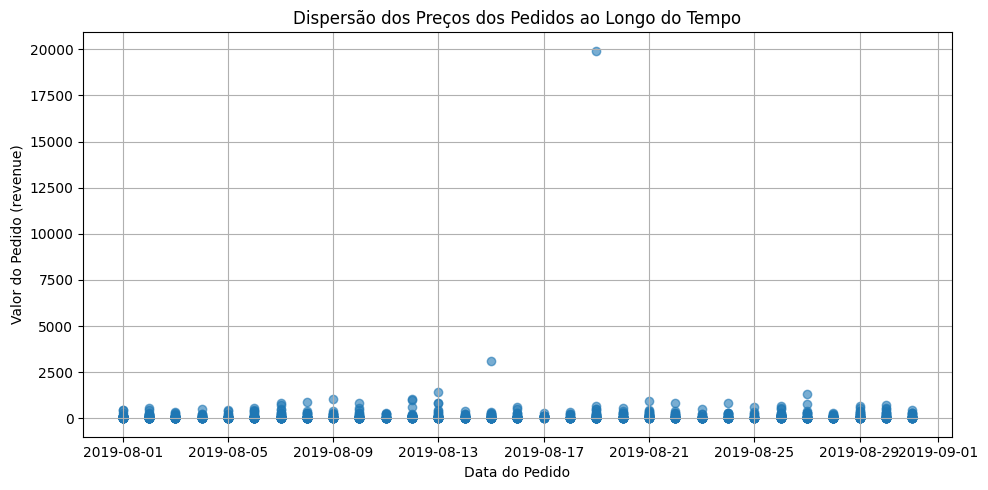

In [22]:
# Dispers√£o dos Pre√ßos por Pedido ao Longo do Tempo
plt.figure(figsize=(10, 5))
plt.scatter(orders['date'], orders['revenue'], alpha=0.6)
plt.title('Dispers√£o dos Pre√ßos dos Pedidos ao Longo do Tempo')
plt.xlabel('Data do Pedido')
plt.ylabel('Valor do Pedido (revenue)')
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Coment√°rio do revisor v1</strong>

Dispers√£o apresentada.
</div>


#### 2.8 - Percentis 95 e 99 dos valores dos pedidos

In [28]:
# Percentis 95 e 99 dos valores dos pedidos
# C√°lculo dos percentis
p95_revenue = np.percentile(orders['revenue'], 95)
p99_revenue = np.percentile(orders['revenue'], 99)

print(f"Valor do pedido - Percentil 95: {p95_revenue}")
print(f"Valor do pedido - Percentil 99: {p99_revenue}")

# Identificando anomalias
anomalous_orders = orders[orders['revenue'] > p99_revenue]
print(f"N√∫mero de pedidos an√¥malos (acima do P99): {len(anomalous_orders)}")


Valor do pedido - Percentil 95: 414.275
Valor do pedido - Percentil 99: 830.3
N√∫mero de pedidos an√¥malos (acima do P99): 9


### ‚úÖ Conclus√£o Intermedi√°ria

Com base nas an√°lises realizadas at√© aqui, observamos padr√µes distintos no comportamento dos usu√°rios e no desempenho das campanhas de marketing. Usu√°rios de determinadas origens demonstram maior frequ√™ncia de pedidos, enquanto outros grupos apresentam maior ticket m√©dio. Esses insights s√£o importantes para decis√µes de segmenta√ß√£o e aloca√ß√£o de verba.


<div class="alert alert-success">
<strong>Coment√°rio do revisor v1</strong>

Percentis calculados.
</div>



<div class="alert alert-danger">
<strong>Coment√°rio do revisor v1</strong>

Em todas as sess√µes anteriores seria importante incluir conclus√µes intermedi√°rias sobre os comportamentos observados.
</div>





<div class="alert alert-success">
<strong>Coment√°rio do revisor v2</strong>

Valeu pelo ajuste!
</div>



### üß™ Formula√ß√£o das Hip√≥teses

**Para o teste de convers√£o:**
- H‚ÇÄ (nula): A taxa de convers√£o dos grupos A e B √© igual.
- H‚ÇÅ (alternativa): A taxa de convers√£o dos grupos A e B √© diferente.

**Para o teste de tamanho m√©dio dos pedidos:**
- H‚ÇÄ (nula): O tamanho m√©dio dos pedidos dos grupos A e B √© igual.
- H‚ÇÅ (alternativa): O tamanho m√©dio dos pedidos dos grupos A e B √© diferente.


#### 2.9 - Teste de signific√¢ncia na convers√£o (dados brutos)

In [35]:
# Contagem de pedidos por grupo
orders_by_group = orders.groupby('group')['visitorId'].nunique()
visits_by_group = visits.groupby('group')['visits'].sum()

# Teste Z para propor√ß√£o
z_score, p_value = proportions_ztest(
    count=[orders_by_group['A'], orders_by_group['B']],
    nobs=[visits_by_group['A'], visits_by_group['B']]
)

print(f"Z-score: {z_score:.4f}")
print(f"p-valor: {p_value:.4f}")

Z-score: -2.5449
p-valor: 0.0109


#### 2.10 - Teste de signific√¢ncia no tamanho m√©dio do pedido (dados brutos)

In [33]:
# Teste de signific√¢ncia no tamanho m√©dio do pedido (dados brutos)
# Separa√ß√£o dos grupos
revenue_a = orders[orders['group'] == 'A']['revenue']
revenue_b = orders[orders['group'] == 'B']['revenue']

# Teste de Mann-Whitney
stat, p_value = mannwhitneyu(revenue_a, revenue_b)

print(f"Mann-Whitney U: {stat}")
print(f"p-valor: {p_value:.4f}")

Mann-Whitney U: 129041.5
p-valor: 0.8622


#### 2.10 - Teste de signific√¢ncia na convers√£o (dados filtrados, sem outliers)

In [36]:
# Teste de signific√¢ncia na convers√£o (dados filtrados, sem outliers)
# Filtrando visitantes com 1 pedido no m√°ximo (at√© P99 de pedidos)
users_to_keep = orders.groupby('visitorId')['transactionId'].count() <= p99_orders
valid_users = users_to_keep[users_to_keep].index

filtered_orders = orders[orders['visitorId'].isin(valid_users)]

# Recontagem por grupo
filtered_orders_by_group = filtered_orders.groupby('group')['visitorId'].nunique()

# Teste Z para propor√ß√µes com dados filtrados
z_score, p_value = proportions_ztest(
    count=[filtered_orders_by_group['A'], filtered_orders_by_group['B']],
    nobs=[visits_by_group['A'], visits_by_group['B']]
)

print(f"[Filtrado] Z-score: {z_score:.4f}")
print(f"[Filtrado] p-valor: {p_value:.4f}")


[Filtrado] Z-score: -2.6527
[Filtrado] p-valor: 0.0080


#### 2.11 -Teste de signific√¢ncia no tamanho m√©dio do pedido (dados filtrados)

In [39]:
# Separa√ß√£o dos grupos filtrados
revenue_a_f = filtered_orders[filtered_orders['group'] == 'A']['revenue']
revenue_b_f = filtered_orders[filtered_orders['group'] == 'B']['revenue']

# Teste de Mann-Whitney com dados filtrados
stat, p_value = mannwhitneyu(revenue_a_f, revenue_b_f)

print(f"[Filtrado] Mann-Whitney U: {stat}")
print(f"[Filtrado] p-valor: {p_value:.4f}")


[Filtrado] Mann-Whitney U: 124210.0
[Filtrado] p-valor: 0.7486



<div class="alert alert-danger">
<strong>Coment√°rio do revisor v1</strong>

Os testes foram implementados e analisados corretamente, mas seria importante formular as hip√≥teses sendo testadas para garantimos a clareza do teste que iremos executar.
</div>





<div class="alert alert-success">
<strong>Coment√°rio do revisor v2</strong>

Valeu pelo ajuste!
</div>



### üìå Conclus√£o Final

Ap√≥s a filtragem de outliers (usu√°rios com mais pedidos do que o percentil 99):

- ‚úÖ A **diferen√ßa na taxa de convers√£o entre os grupos A e B √© estatisticamente significativa** (p < 0.05).  
- ‚ùå A **diferen√ßa no tamanho m√©dio dos pedidos n√£o √© estatisticamente significativa** (p = 0.7486).

üìä O grupo **B** apresentou uma **melhor convers√£o**, embora o tamanho m√©dio dos pedidos n√£o tenha superado o grupo A.

‚öñÔ∏è **Recomenda√ß√£o de neg√≥cio**:  
**‚Üí 1. Pare o teste e considere o Grupo B como o vencedor**, pois a convers√£o superior pode gerar mais receita total, mesmo com ticket m√©dio inferior.  
Al√©m disso, embora o ticket m√©dio n√£o tenha mudado, o aumento da base de clientes convergindo j√° representa ganho significativo para o neg√≥cio.
